In [1]:
# 라이브러리
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)


2.15.0
1.24.3


# 1차 시도

## 1. 데이터 준비

In [2]:
# 라이브러리
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### - 데이터 사이즈 변경

In [50]:
from PIL import Image
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")


	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [5]:
# 가위 데이터 resize
image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [6]:
# 바위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [7]:
# 보 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### - load_data()로 데이터 읽기

In [40]:
import numpy as np

def load_data(img_path, number_of_data=600):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [7]:
image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


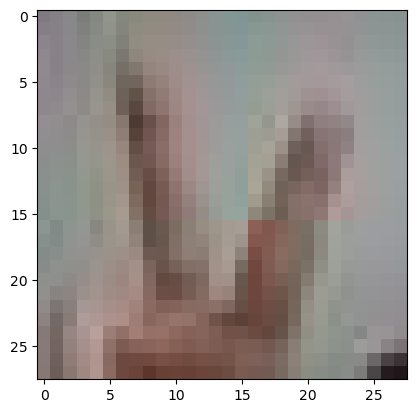

In [9]:
# 이미지 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 2. 딥러닝 네트워크 설계하기

In [57]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3))) 
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))  
model.add(keras.layers.Dense(3, activation='softmax'))  

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

## 3. 딥러닝 네트워크 학습시키기

In [9]:
# 모델학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10


10/10 [==============================] - 4s 18ms/step - loss: 1.0993 - accuracy: 0.3167
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 1.0644 - accuracy: 0.3467
Epoch 3/10
10/10 [==============================] - 0s 39ms/step - loss: 1.0211 - accuracy: 0.7267
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 0.9476 - accuracy: 0.7433
Epoch 5/10
10/10 [==============================] - 0s 22ms/step - loss: 0.8209 - accuracy: 0.9233
Epoch 6/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6442 - accuracy: 0.9067
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 0.4723 - accuracy: 0.9400
Epoch 8/10
10/10 [==============================] - 0s 19ms/step - loss: 0.3375 - accuracy: 0.9533
Epoch 9/10
10/10 [==============================] - 0s 19ms/step - loss: 0.2144 - accuracy: 0.9800
Epoch 10/10
10/10 [==============================] - 0s 26ms/step - loss: 0.1472 - accuracy: 0.9867


## 4. 성능 확인

### - test 데이터 사이즈 변경 및 세팅

In [17]:
# test가위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

110  images to be resized.
110  images resized.
가위 이미지 resize 완료!


In [18]:
# test 바위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

128  images to be resized.
128  images resized.
바위 이미지 resize 완료!


In [19]:
# test 보 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

109  images to be resized.
109  images resized.
보 이미지 resize 완료!


In [10]:
# test 데이터 셋

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### - 모델 성능 확인

In [11]:
# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 2.2000 - accuracy: 0.4967 - 555ms/epoch - 56ms/step
test_loss: 2.20002818107605
test_accuracy: 0.49666666984558105


In [12]:
# 실제 추론한 확률분포 출력
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test 확인
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 7ms/step
model.predict() 결과 :  [0.3453927  0.02293652 0.6316708 ]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


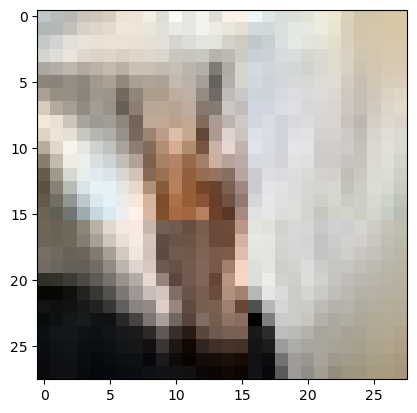

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.4880705e-02 5.9638147e-05 9.7505969e-01]
라벨: 1, 예측결과: 2


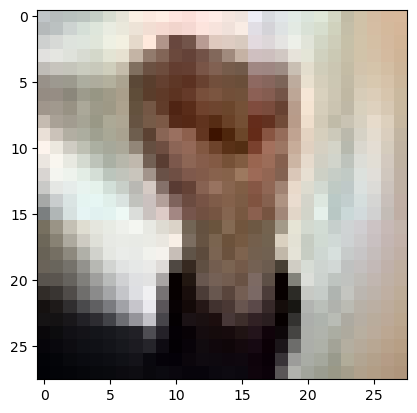

예측확률분포: [9.4059151e-01 2.9658494e-04 5.9111927e-02]
라벨: 1, 예측결과: 0


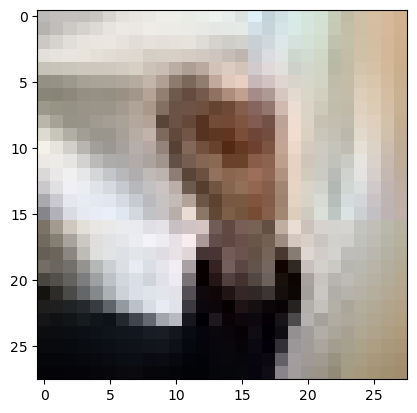

예측확률분포: [0.35983405 0.00458395 0.635582  ]
라벨: 0, 예측결과: 2


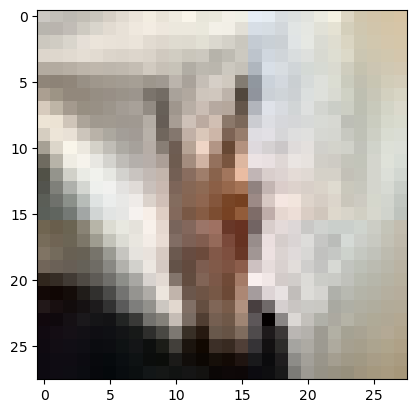

예측확률분포: [0.77430546 0.05863734 0.16705723]
라벨: 1, 예측결과: 0


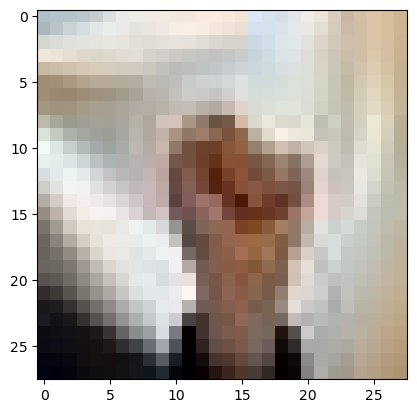

예측확률분포: [0.9642342  0.00779578 0.02797004]
라벨: 1, 예측결과: 0


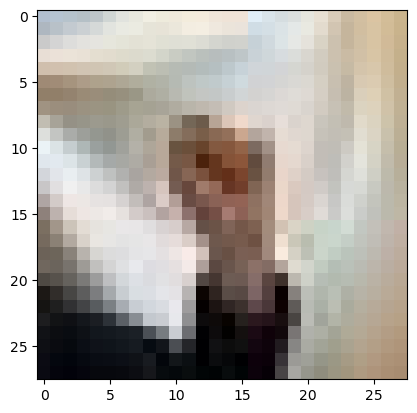

In [15]:
# 실제와 다른 값 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 2차 시도

## 1. 데이터 전처리(사진 이름 및 사이즈변경)

In [81]:
import os

folder_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\rock'

os.chdir(folder_path)

for i in range(100):
    old_name = f'{i}.jpg'  # 기존 파일 이름
    new_name = f'{i + 600}.jpg'  # 새로운 파일 이름
    os.rename(old_name, new_name)  # 파일 이름 변경

In [51]:
# 추가 가위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 추가 바위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 추가 보 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!
0  images to be resized.
0  images resized.
바위 이미지 resize 완료!
0  images to be resized.
0  images resized.
보 이미지 resize 완료!


## 2. 훈련 데이터셋

In [85]:
import numpy as np
import glob
from PIL import Image

def load_data(img_path, number_of_data=2100):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [86]:
# 훈련 데이터 및 정규화
image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper'
x_train, y_train = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

## 2차때는 훈련 데이터 샘플이 600개였습니다. 
# 현재셀에서 코드를 중복해서 쓰다보니 2100으로 출력되어 있습니다.

학습데이터(x_train)의 이미지 개수는 2100 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)


## 3. 신경망 수정 및 모델학습

In [82]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3))) 
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))  # Dropout 추가
model.add(keras.layers.Dense(128, activation='relu'))  
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 1, 1, 128)        

In [72]:
# 모델학습
# SGD로 변경
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
45/45 [==============================] - 3s 44ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 10.7718 - val_accuracy: 0.2917
Epoch 2/15
45/45 [==============================] - 2s 34ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 10.6749 - val_accuracy: 0.3056
Epoch 3/15
45/45 [==============================] - 2s 34ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 11.1539 - val_accuracy: 0.2972
Epoch 4/15
45/45 [==============================] - 1s 27ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 10.8116 - val_accuracy: 0.2583
Epoch 5/15
45/45 [==============================] - 1s 30ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 11.4804 - val_accuracy: 0.3028
Epoch 6/15
45/45 [==============================] - 1s 29ms/step - loss: 7.4260e-04 - accuracy: 1.0000 - val_loss: 11.5720 - val_accuracy: 0.2944
Epoch 7/15
45/45 [==============================] - 1s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 11.4884 - val_accuracy: 0.2972
Ep

## 4. 모델 성능 확인

### - test 데이터

In [59]:
# 사이즈 변경

# test 가위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# test 바위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# test 보 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [73]:
# test 데이터 셋

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [74]:
# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.9803 - accuracy: 0.4133 - 118ms/epoch - 12ms/step
test_loss: 2.9802730083465576
test_accuracy: 0.41333332657814026


# 3차 시도

## 1. 모델학습(학습률 변경)

In [75]:
from tensorflow.keras.optimizers import SGD

learning_rate = 0.001
opt = SGD(learning_rate=learning_rate)

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 학습
model.fit(x_train_norm, y_train, epochs=25)

Epoch 1/25
57/57 [==============================] - 3s 25ms/step - loss: 0.8926 - accuracy: 0.8194
Epoch 2/25
57/57 [==============================] - 1s 24ms/step - loss: 0.5202 - accuracy: 0.8367
Epoch 3/25
57/57 [==============================] - 1s 24ms/step - loss: 0.3961 - accuracy: 0.8711
Epoch 4/25
57/57 [==============================] - 1s 25ms/step - loss: 0.3470 - accuracy: 0.8689
Epoch 5/25
57/57 [==============================] - 1s 24ms/step - loss: 0.3043 - accuracy: 0.8911
Epoch 6/25
57/57 [==============================] - 2s 27ms/step - loss: 0.2585 - accuracy: 0.9139
Epoch 7/25
57/57 [==============================] - 2s 37ms/step - loss: 0.2480 - accuracy: 0.9089
Epoch 8/25
57/57 [==============================] - 2s 33ms/step - loss: 0.2278 - accuracy: 0.9250
Epoch 9/25
57/57 [==============================] - 2s 27ms/step - loss: 0.2067 - accuracy: 0.9311
Epoch 10/25
57/57 [==============================] - 1s 26ms/step - loss: 0.2141 - accuracy: 0.9217
Epoch 11/

## 2. 모델 성능 확인

In [76]:
# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.9306 - accuracy: 0.3200 - 465ms/epoch - 46ms/step
test_loss: 1.9305814504623413
test_accuracy: 0.3199999928474426


# 4차 시도

## 1. 훈련 데이터 샘플 600개 → 2100개

In [87]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
66/66 [==============================] - 5s 28ms/step - loss: 1.1009 - accuracy: 0.3519
Epoch 2/20
66/66 [==============================] - 2s 29ms/step - loss: 1.0515 - accuracy: 0.4367
Epoch 3/20
66/66 [==============================] - 2s 26ms/step - loss: 0.6296 - accuracy: 0.7429
Epoch 4/20
66/66 [==============================] - 2s 30ms/step - loss: 0.2657 - accuracy: 0.9052
Epoch 5/20
66/66 [==============================] - 2s 32ms/step - loss: 0.1585 - accuracy: 0.9481
Epoch 6/20
66/66 [==============================] - 2s 30ms/step - loss: 0.0918 - accuracy: 0.9733
Epoch 7/20
66/66 [==============================] - 2s 26ms/step - loss: 0.0789 - accuracy: 0.9743
Epoch 8/20
66/66 [==============================] - 2s 34ms/step - loss: 0.0515 - accuracy: 0.9852
Epoch 9/20
66/66 [==============================] - 2s 32ms/step - loss: 0.0393 - accuracy: 0.9871
Epoch 10/20
66/66 [==============================] - 2s 33ms/step - loss: 0.0787 - accuracy: 0.9767
Epoch 11/

## 2. 모델 성능 확인

In [88]:
# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 2.1239 - accuracy: 0.5767 - 679ms/epoch - 68ms/step
test_loss: 2.123871088027954
test_accuracy: 0.5766666531562805


# 5차 시도

## 1. 추가 데이터 사이즈 변경

In [94]:
import os

folder_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\scissor'

os.chdir(folder_path)

for i in range(100):
    old_name = f'{i}.jpg'  
    new_name = f'{i + 900}.jpg' 
    os.rename(old_name, new_name)  
    
folder_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\rock'

os.chdir(folder_path)

for i in range(100):
    old_name = f'{i}.jpg'  
    new_name = f'{i + 900}.jpg'  
    os.rename(old_name, new_name)  
    
folder_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\paper'

os.chdir(folder_path)

for i in range(100):
    old_name = f'{i}.jpg'  
    new_name = f'{i + 900}.jpg'  
    os.rename(old_name, new_name)

In [95]:
# 추가 가위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 추가 바위 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 추가 보 데이터 resize

image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\reshape\paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


## 2. 데이터 샘플 수 변경 2100 → 12000개

In [98]:
import numpy as np

def load_data(img_path, number_of_data=12000):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [99]:
image_dir_path = r'C:\Users\Lenovo\aiffel\Aiffel_Quest\Main03\rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 12000 입니다.
x_train shape: (12000, 28, 28, 3)
y_train shape: (12000,)


## 3. 모델 학습 및 성능확인

In [104]:
# 학습률 0.001 변경

learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
375/375 [==============================] - 11s 22ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 2/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0083 - accuracy: 0.9982
Epoch 3/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 4/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0079 - accuracy: 0.9982
Epoch 5/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0082 - accuracy: 0.9979
Epoch 6/20
375/375 [==============================] - 8s 22ms/step - loss: 0.0039 - accuracy: 0.9983
Epoch 7/20
375/375 [==============================] - 10s 28ms/step - loss: 7.1162e-04 - accuracy: 0.9997
Epoch 8/20
375/375 [==============================] - 10s 27ms/step - loss: 1.6607e-04 - accuracy: 1.0000
Epoch 9/20
375/375 [==============================] - 10s 26ms/step - loss: 6.6004e-05 - accuracy: 1.0000
Epoch 10/20
375/375 [==============================] - 14s 37ms/step - los

In [105]:
# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 3.7448 - accuracy: 0.6067 - 383ms/epoch - 38ms/step
test_loss: 3.744760036468506
test_accuracy: 0.6066666841506958


# 6차 시도

## 1. 학습률 및 에폭 변경

In [107]:
learning_rate = 0.002  # 학습률 조정
opt = Adam(learning_rate=learning_rate)

model.compile(optimizer=opt,  # optimizer 변경
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=25)  # 에폭 수 증가

# 데이터 성능 확인
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/25
375/375 [==============================] - 12s 28ms/step - loss: 0.0148 - accuracy: 0.9963
Epoch 2/25
375/375 [==============================] - 10s 26ms/step - loss: 0.0133 - accuracy: 0.9977
Epoch 3/25
375/375 [==============================] - 9s 24ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 4/25
375/375 [==============================] - 9s 24ms/step - loss: 1.7016e-04 - accuracy: 1.0000
Epoch 5/25
375/375 [==============================] - 8s 23ms/step - loss: 1.0221e-04 - accuracy: 1.0000
Epoch 6/25
375/375 [==============================] - 9s 24ms/step - loss: 2.2596e-05 - accuracy: 1.0000
Epoch 7/25
375/375 [==============================] - 9s 23ms/step - loss: 3.6727e-05 - accuracy: 1.0000
Epoch 8/25
375/375 [==============================] - 9s 24ms/step - loss: 4.1815e-05 - accuracy: 1.0000
Epoch 9/25
375/375 [==============================] - 10s 26ms/step - loss: 2.3346e-05 - accuracy: 1.0000
Epoch 10/25
375/375 [==============================] - 10s 26ms/

# 7차 시도

In [114]:
# 신경망

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(3, activation='softmax'))

In [115]:
learning_rate = 0.001  # 학습률 조정
opt = Adam(learning_rate=learning_rate)

model.compile(optimizer=opt,  # optimizer 변경
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=25)  

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/25
375/375 [==============================] - 13s 28ms/step - loss: 0.6031 - accuracy: 0.6955
Epoch 2/25
375/375 [==============================] - 11s 30ms/step - loss: 0.0624 - accuracy: 0.9783
Epoch 3/25
375/375 [==============================] - 11s 29ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 4/25
375/375 [==============================] - 10s 26ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 5/25
375/375 [==============================] - 14s 38ms/step - loss: 0.0121 - accuracy: 0.9964
Epoch 6/25
375/375 [==============================] - 11s 30ms/step - loss: 0.0091 - accuracy: 0.9977
Epoch 7/25
375/375 [==============================] - 10s 28ms/step - loss: 0.0172 - accuracy: 0.9959
Epoch 8/25
375/375 [==============================] - 9s 23ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 9/25
375/375 [==============================] - 9s 23ms/step - loss: 0.0106 - accuracy: 0.9966
Epoch 10/25
375/375 [==============================] - 10s 28ms/step - loss: 0.0093 

# 회고

- 성능이 좋지 못한 결과가 계속 나왔습니다,
- 데이터 샘플이 부족해서 그런지, 적합한 하이퍼파리미터를 찾지 못해서 그런지 확인하지 못했습니다.
- 전체적으로 데이터 샘플 구성, 하이퍼파라미터 탐색에 대한 계획을 세우고 신경망과 모델을 구성해야 겠다는 생각을 했습니다.